In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns   

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(train.shape)
print(train.info())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print("missing values in train dataset:")
print(train.isna().sum())

missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\2771728142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='Set2')


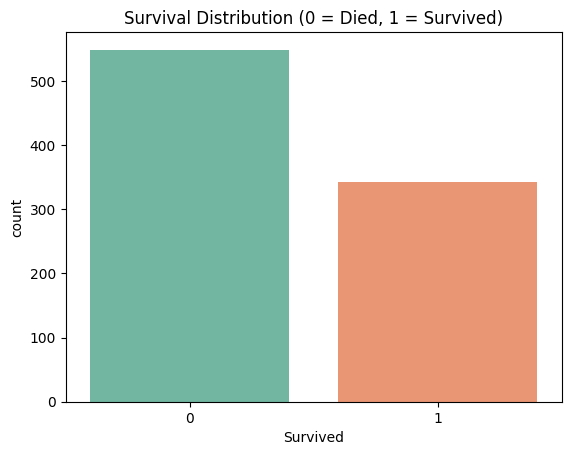

In [5]:
# Count survival distribution
print(train['Survived'].value_counts(normalize=True))

# Visualize survival rate
sns.countplot(x='Survived', data=train, palette='Set2')
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()



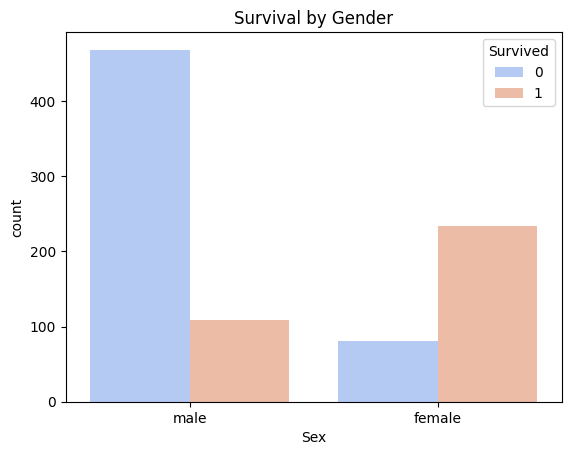


Mean Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [6]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()
print("\nMean Survival by Gender:")
print(train.groupby('Sex')['Survived'].mean())

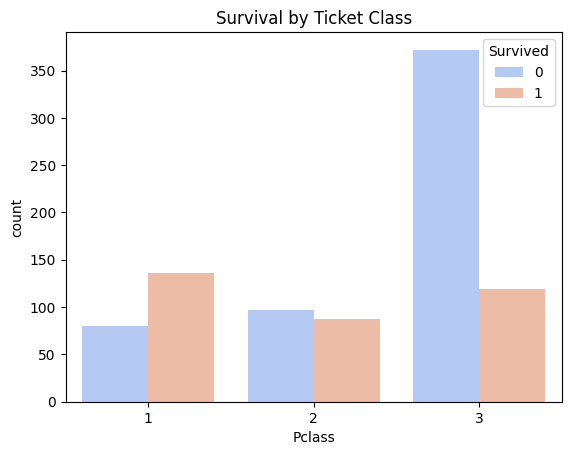


Mean Survival by Passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='coolwarm')
plt.title('Survival by Ticket Class')
plt.show()
print("\nMean Survival by Passenger class:")
print(train.groupby('Pclass')['Survived'].mean())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
0


C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\142993155.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


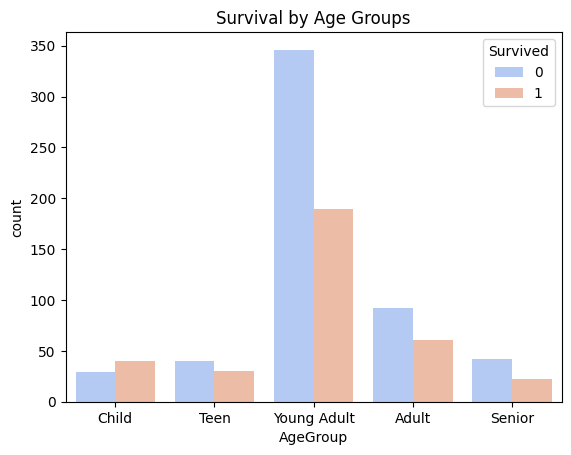


Mean survival by age group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.398693
Senior         0.343750
Name: Survived, dtype: float64


C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\142993155.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('AgeGroup')['Survived'].mean())


In [8]:
import pandas as pd

train = pd.read_csv('train.csv')  # Make sure this is the original Titanic dataset
print(train['Age'].head(10))

train['Age'].fillna(train['Age'].median(), inplace=True)

print(train['Age'].isna().sum())  # Should print 0

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 50, 80],
                              labels=['Child','Teen','Young Adult','Adult','Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Age Groups")
plt.show()

print("\nMean survival by age group:")
print(train.groupby('AgeGroup')['Survived'].mean())

C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\3958686464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)


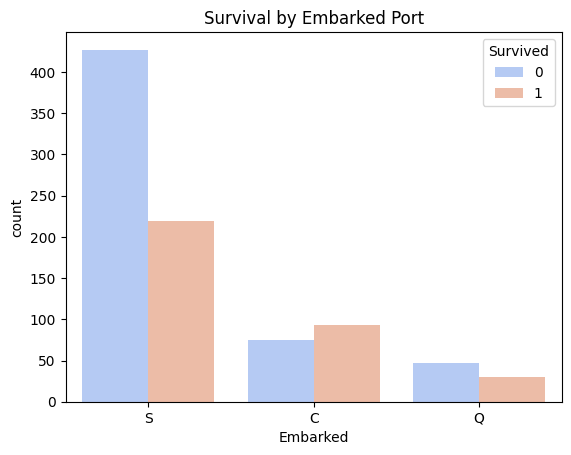


Mean survival by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
sns.countplot(x='Embarked', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Embarked Port")
plt.show()
print("\nMean survival by Embarked Port:")
print(train.groupby('Embarked')['Survived'].mean())

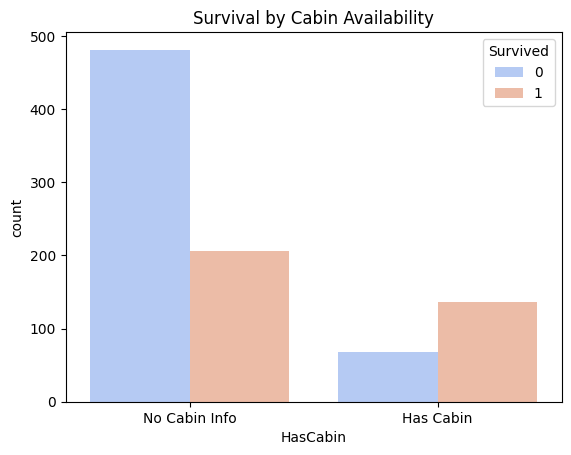


Mean survival by Cabin Availability:
HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [10]:
train['HasCabin'] = train['Cabin'].notna().astype(int)
sns.countplot(x='HasCabin', hue='Survived', data=train, palette='coolwarm')
plt.title("Survival by Cabin Availability")
plt.xticks([0,1], ['No Cabin Info', 'Has Cabin'])
plt.show()
print("\nMean survival by Cabin Availability:")
print(train.groupby('HasCabin')['Survived'].mean())

In [11]:
# Fill Fare if missing
train['Fare'].fillna(train['Fare'].median(), inplace=True)



C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\1669231084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Fare'].fillna(train['Fare'].median(), inplace=True)


In [12]:
# Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'] = train['Title'].replace(['Lady','Countess','Capt','Col',
                                         'Don','Dr','Major','Rev','Sir',
                                         'Jonkheer','Dona'], 'Rare')
train['Title'] = train['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})



<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\nahal\AppData\Local\Temp\ipykernel_1140\2462739057.py:2: SyntaxWarning: invalid escape sequence '\.'
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [13]:
# Family Size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1


In [14]:
from sklearn.preprocessing import LabelEncoder
# Encode Sex
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [15]:
# One-Hot Encoding for Embarked and Title
train = pd.get_dummies(train, columns=['Embarked','Title'], drop_first=True)

# Drop unnecessary columns
train.drop(['PassengerId','Name','Ticket','Cabin','AgeGroup'], axis=1, inplace=True)


In [16]:
print("\nFinal Processed Data:")
print(train.head())


Final Processed Data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  FamilySize  \
0         0       3    1  22.0      1      0   7.2500         0           2   
1         1       1    0  38.0      1      0  71.2833         1           2   
2         1       3    0  26.0      0      0   7.9250         0           1   
3         1       1    0  35.0      1      0  53.1000         1           2   
4         0       3    1  35.0      0      0   8.0500         0           1   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False        True       False      True      False       False  
1       False       False       False     False       True       False  
2       False        True        True     False      False       False  
3       False        True       False     False       True       False  
4       False        True       False      True      False       False  


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Separate features and target
X = train.drop('Survived', axis=1)
y = train['Survived']

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# 1. Logistic Regression
# ----------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

# Cross-validation
cv_scores_lr = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression CV Accuracy:", cv_scores_lr.mean())

Logistic Regression Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Logistic Regression CV Accuracy: 0.8226539451384094


In [21]:
# 2. Random Forest
# ----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("\nRandom Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Accuracy:", cv_scores_rf.mean())



Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest CV Accuracy: 0.8092021844203126


In [22]:
# 3. XGBoost
# ----------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

print("\nXGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))

cv_scores_xgb = cross_val_score(xgb, X, y, cv=5)
print("XGBoost CV Accuracy:", cv_scores_xgb.mean())

c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\nahal\OneDrive\Documents\Titanic-survivors-ml\titanic\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:47:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost CV Accuracy: 0.8193019898311468


In [23]:
print("\n--- Model Comparison (CV Accuracy) ---")
print(f"Logistic Regression: {cv_scores_lr.mean():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.4f}")
print(f"XGBoost: {cv_scores_xgb.mean():.4f}")


--- Model Comparison (CV Accuracy) ---
Logistic Regression: 0.8227
Random Forest: 0.8092
XGBoost: 0.8193


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [31]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Evaluation ===")
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")


In [ ]:
cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Died', 'Survived'],
                yticklabels=['Died', 'Survived'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
or cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


IndentationError: unexpected indent (3905429489.py, line 2)